In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mutual_info_score

from code.util import *
from code.preprocessor import *

In [2]:
data = load("data/urls_sampled.pkl")

In [3]:
x = data.url
y = data.target

In [4]:
vect = CountVectorizer(
    tokenizer=tokenize,
    max_features=4000
)

In [5]:
x0 = vect.fit_transform(x).toarray()

In [6]:
x0.shape

(127284, 4000)

In [7]:
mi = np.array([mutual_info_score(x0[:, i], y) for i in range(x0.shape[1])])

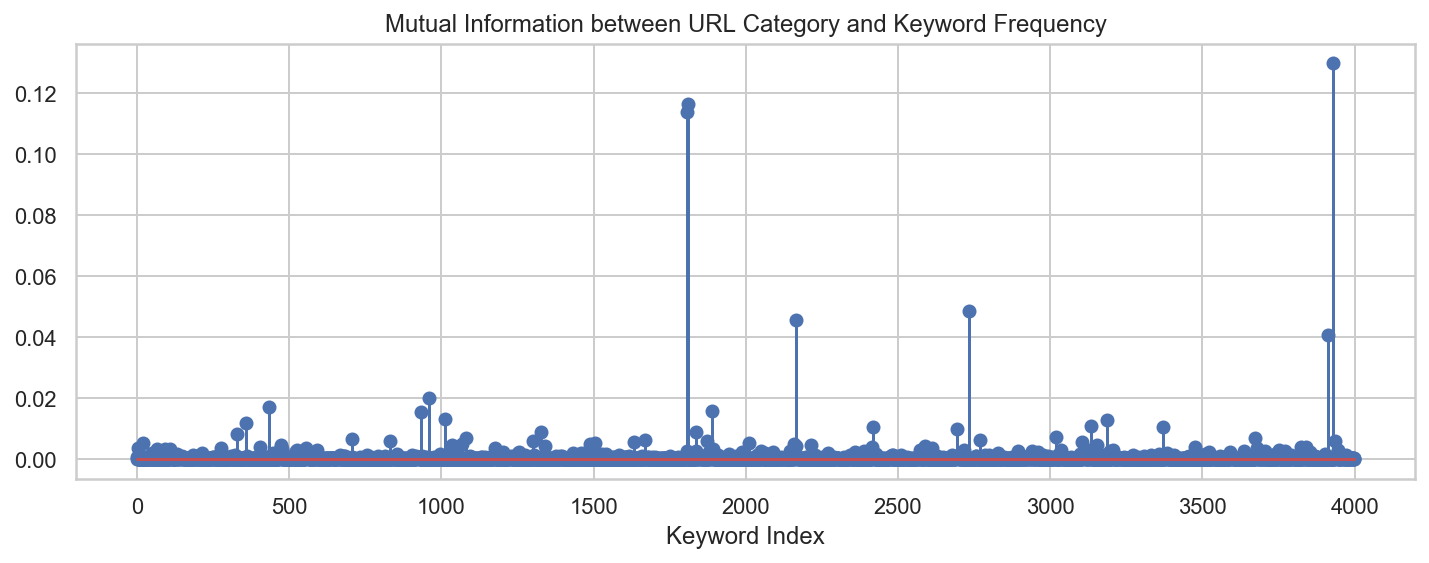

In [8]:
plt.figure(figsize=(12, 4))
plt.title("Mutual Information between URL Category and Keyword Frequency")
plt.xlabel("Keyword Index")
plt.stem(mi)
plt.show()

In [11]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
words = [inv_vocabulary[idx[i]] for i in range(100)]
pprint(words)

['www',
 'https',
 'http',
 'php',
 'login',
 'wp',
 'com',
 'amp',
 'includes',
 'cmd',
 'content',
 'signin',
 'admin',
 'session',
 'submit',
 'myaccount',
 'paypal',
 'id',
 'email',
 'account',
 'ru',
 'customer',
 'update',
 'br',
 'plugins',
 'google',
 'center',
 'edu',
 'x',
 'images',
 'secure',
 'geocities',
 'firebaseapp',
 'js',
 '1',
 'css',
 'locale',
 'file',
 'country',
 'mail',
 'sharepoint',
 'apple',
 'onedrive',
 'log',
 'en',
 'app',
 'themes',
 'wdformid',
 'websc',
 'alibaba',
 'my',
 'org',
 'dhl',
 '000webhostapp',
 'uploads',
 'auth',
 '7d',
 'appleid',
 '1774256418',
 '1drv',
 'index',
 '13inboxlight',
 'in',
 'xs',
 'service',
 'office',
 'fid',
 'personal',
 'verification',
 'bankofamerica',
 'aspxn',
 'sites',
 's',
 'regruhosting',
 'simplepie',
 'cp',
 'aspx',
 'rand',
 'ms',
 'uk',
 'userid',
 'view',
 'icu',
 'htmlpasta',
 'verify',
 'live',
 'known',
 'security',
 'layouts',
 'dispatch',
 'jehfuq',
 'img',
 'well',
 'top',
 'dropbox',
 'resolution',


In [12]:
save(words, "data/mi_100.pkl")